<a href="https://colab.research.google.com/github/karima33/python_projects/blob/main/check7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the data set 
data_ = pd.read_csv("/content/titanic-passengers.csv", sep=';')
data_.shape


(891, 12)

In [3]:
#The head of the dataset
data_.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [4]:
#Showing  the columns 
data_.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [5]:
#Some general informations about the data columns and values like the types 
data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [6]:
#Summary statistics of the numerical  columns
data_.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#Summary statistics of the non numerical  columns
data_.describe(exclude=np.number)

,Survived,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,204,889
unique,2,891,2,681,147,3
top,No,"Collander, Mr. Erik Gustaf",male,CA. 2343,G6,S
freq,549,1,577,7,4,644


In [8]:
#finding missing informations / values
data_.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Replacing missing values 
data_['Age'] = data_['Age'].fillna(data_['Age'].mean())
data_['Cabin'] = data_['Cabin'].fillna(data_['Cabin'].mode()[0])
data_['Embarked'] = data_['Embarked'].fillna(data_['Embarked'].mode()[0])

In [10]:
#Checking again null values
data_.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

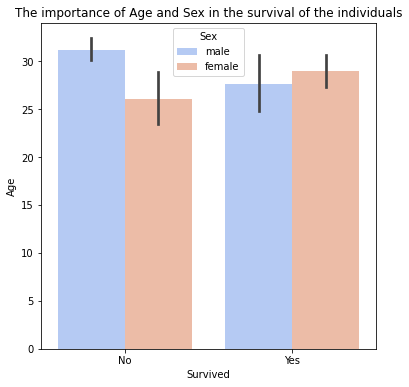

In [11]:
#The importance of Age and Sex in the survival of the individuals
plt.figure(figsize=(6,6))
sns.barplot(y='Age', x='Survived',data=data_,hue='Sex',palette = "coolwarm")

plt.xlabel("Survived")
plt.ylabel("Age")
plt.title("The importance of Age and Sex in the survival of the individuals")
plt.show()

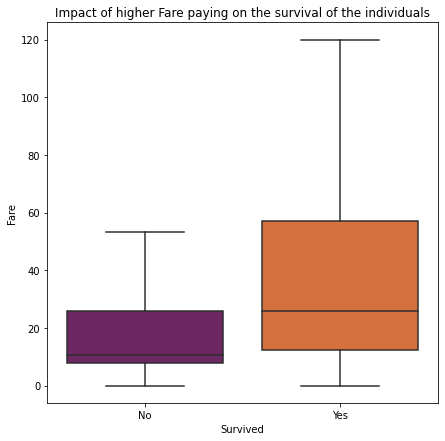

In [12]:
#Impact of higher Fare paying on the survival of the individuals
plt.figure(figsize=(7,7))
sns.boxplot(x='Survived',y='Fare',data=data_, showfliers = False,palette='inferno')
plt.xlabel("Survived")
plt.ylabel("Fare")
plt.title("Impact of higher Fare paying on the survival of the individuals")
plt.show()

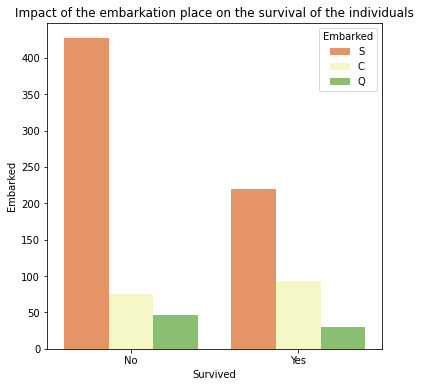

In [13]:
#Impact of the embarkation place on the survival of the individuals
plt.figure(figsize=(6,6))
sns.countplot(x='Survived',data=data_, hue='Embarked',palette='RdYlGn')
plt.xlabel("Survived")
plt.ylabel("Embarked")
plt.title("Impact of the embarkation place on the survival of the individuals")
plt.show()

In [14]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

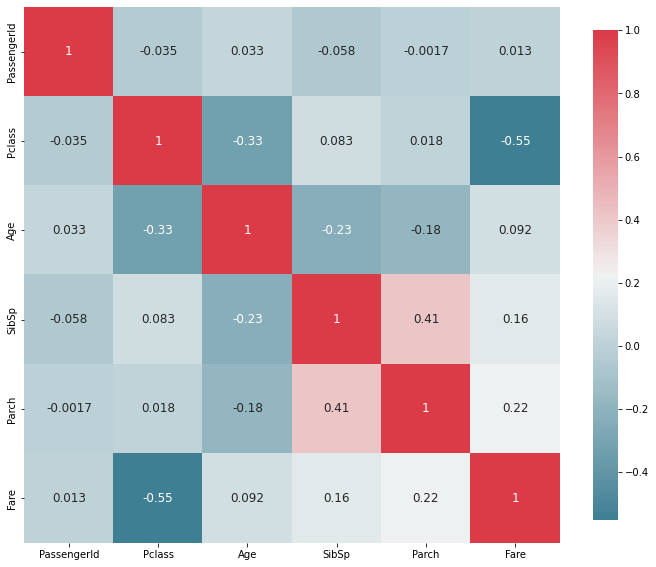

In [15]:
plot_correlation_map( data_ )

The **plot_correlation_map** function is a function that has been created in order to plot a heatmap or a correlation map, Since heatmaps provide us with an easy tool to understand the correlation between two entities, they can be used to visualize the correlation among the features of a machine learning model. This may help us in feature selection by eliminating highly correlated features.

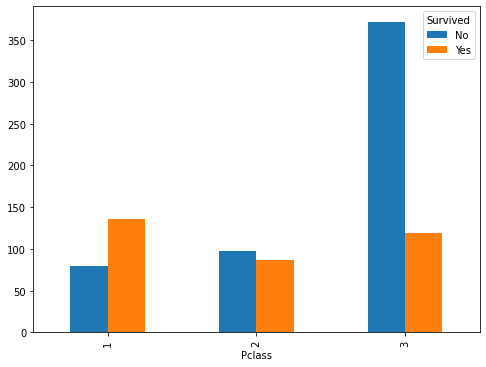

In [16]:
#Use the groupby function combined with the mean() to view the relation between Pclass and survived 
data_.groupby(['Pclass', 'Survived'] )['Survived'].count().unstack(1).plot.bar(figsize=(8, 6))

In [17]:
#creatin the new column called Title which contains the appropriate Title for each individual
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}
def get_titles():
    #  extraction of  the title from each name
    data_['Title'] = data_['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated title
    #  mapping each title
    data_['Title'] = data_.Title.map(Title_Dictionary)
   
    return data_

In [18]:
data_ = get_titles()
data_.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,B96 B98,S,Mr
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mr
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,B96 B98,S,Mr
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,B96 B98,S,Mrs
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr


In [19]:
#Dropping the name column
data_.drop(['Name'], axis=1, inplace = True)

In [20]:
data_.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,No,2,male,28.0,0,0,248740,13.0000,B96 B98,S,Mr
1,76,No,3,male,25.0,0,0,348123,7.6500,F G73,S,Mr
2,641,No,3,male,20.0,0,0,350050,7.8542,B96 B98,S,Mr
3,568,No,3,female,29.0,0,4,349909,21.0750,B96 B98,S,Mrs
4,672,No,1,male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr


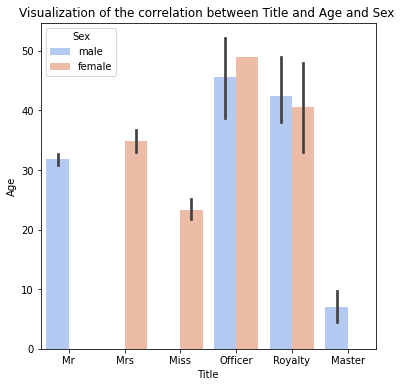

In [21]:
plt.figure(figsize=(6,6))
sns.barplot(y='Age', x='Title', hue= 'Sex', data=data_,palette = "coolwarm")
plt.xlabel("Title")
plt.ylabel("Age")
plt.title("Visualization of the correlation between Title and Age and Sex ")
plt.show()

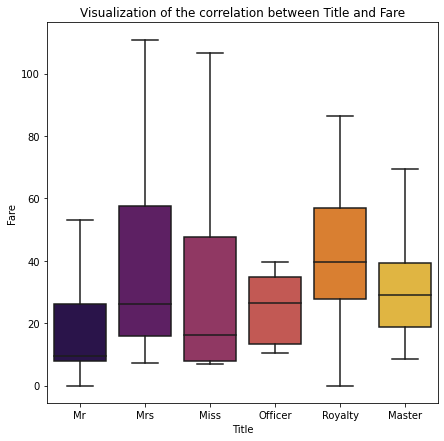

In [22]:
plt.figure(figsize=(7,7))
sns.boxplot(x='Title',y='Fare',data=data_, showfliers = False,palette='inferno')
plt.xlabel("Title")
plt.ylabel("Fare")
plt.title("Visualization of the correlation between Title and Fare")
plt.show()

In [23]:
#reate FamilySize feature
data_['FamilySize'] = data_['SibSp'] + data_['Parch']

In [24]:
data_.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,343,No,2,male,28.0,0,0,248740,13.0000,B96 B98,S,Mr,0
1,76,No,3,male,25.0,0,0,348123,7.6500,F G73,S,Mr,0
2,641,No,3,male,20.0,0,0,350050,7.8542,B96 B98,S,Mr,0
3,568,No,3,female,29.0,0,4,349909,21.0750,B96 B98,S,Mrs,4
4,672,No,1,male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr,1


As we know that during  the Sinking of the Titanic the rescue process has followed the rule "children and women first".  The solo travelers had a much higher chance to die than to survive.
In addition, people traveling in families of sevral members actually had a relatively high chance to survive this is why the FamilySize feature  has a great impact on survival rate on the Titanic.


In [25]:
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder() 
data_['Sex'] = labelencoder.fit_transform(data_['Sex'])

labelencoder= LabelEncoder() 
data_['Title'] = labelencoder.fit_transform(data_['Title']) 

In [26]:

X = data_[['Age', 'FamilySize','Pclass','Sex']] #features
y = data_['Survived'] #target


In [27]:
#Spliting or data into training  data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [28]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((623, 4), (268, 4))

# Applying decision tree classifier to our data using diffrent parameters 

In [29]:
# importing DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [30]:
# Step 1: instantiate the DecisionTreeClassifier model
Tree = DecisionTreeClassifier() #here we didn't set any parameter we're just using the default parameter

# Step 2: Training the model on the data
Tree.fit(X_train, y_train)

# Step 3: Testing the unseen (test) data
y_pred=Tree.predict(X_test)

In [31]:
#Let's see our parameters
Tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [32]:
# Step 1: instantiate the DecisionTreeClassifier model
Tree_gini = DecisionTreeClassifier(criterion = 'gini', max_depth=5, max_features=2, random_state=123) 

# Step 2: Training the model on the data
Tree_gini.fit(X_train, y_train)#here we have used gini impurity for spliting   and  we've set the max_depth parameter to 5, the  max_features to 2 and the random_state parameter to  123 
# Step 3: Testing the unseen (test) data
y_predg=Tree_gini.predict(X_test)

In [33]:
# Step 1: instantiate the DecisionTreeClassifier model
Tree_entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth=5, max_features=2, random_state=123) 

# Step 2: Training the model on the data
Tree_entropy.fit(X_train, y_train)#here we have used entropy for spliting   and  we've set the max_depth parameter to 5, the  max_features to 2 and the random_state parameter to  123 

# Step 3: Testing the unseen (test) data
y_prede=Tree_entropy.predict(X_test)

# Comparing accuaracy 

In [34]:
from sklearn.metrics import accuracy_score

print('Model accuracy score using default params : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score using default params : 0.7761


In [35]:
from sklearn.metrics import accuracy_score

print('Model accuracy score using gini_impurity & max_depth & max_features params: {0:0.4f}'. format(accuracy_score(y_test, y_predg)))

Model accuracy score using gini_impurity & max_depth & max_features params: 0.8022


In [36]:
from sklearn.metrics import accuracy_score

print('Model accuracy score using using entropy & max_depth & max_features params: {0:0.4f}'. format(accuracy_score(y_test, y_prede)))

Model accuracy score using using entropy & max_depth & max_features params: 0.7948


we can see that the tree where we've used gini impurity for splitting  gave a better accuaracy  than the tree who was splitted using entropy, the max depth prameter has also affected our tree. Both gini impurity and entropy are highly preferred criteria when choosing the method to split the branches in a Decision tree. but we can conclude that Gini Impurity is slightly  better as compared to entropy for selecting the best features.

# Tree Visualization

A Decision Tree is a supervised algorithm used in machine learning. It is using a binary tree graph (each node has two children) to assign for each data sample a target value. The target values are presented in the tree leaves. To reach to the leaf, the sample is propagated through nodes, starting at the root node. In each node a decision is made, to which descendant node it should go. A decision is made based on the selected sample’s feature. Decision Tree learning is a process of finding the optimal rules in each internal tree node according to the selected metric.
Decision Trees can be plotted using sevral ways:

* print text representation of the tree with sklearn.tree.export_text method
* plot with sklearn.tree.plot_tree method (matplotlib needed)
* plot with sklearn.tree.export_graphviz method (graphviz needed)
* plot with dtreeviz package (dtreeviz and graphviz needed)

In [37]:
from sklearn import tree

# *Print Text Representation*
Exporting Decision Tree to the text representation can be useful when working on applications whitout user interface or when we want to log information about the model into the text file

In [38]:
text_representation = tree.export_text(Tree_gini)
print(text_representation)

|--- feature_2 <= 2.50
|   |--- feature_3 <= 0.50
|   |   |--- feature_0 <= 23.50
|   |   |   |--- class: Yes
|   |   |--- feature_0 >  23.50
|   |   |   |--- feature_2 <= 1.50
|   |   |   |   |--- class: Yes
|   |   |   |--- feature_2 >  1.50
|   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |--- class: Yes
|   |   |   |   |--- feature_1 >  2.50
|   |   |   |   |   |--- class: Yes
|   |--- feature_3 >  0.50
|   |   |--- feature_2 <= 1.50
|   |   |   |--- feature_1 <= 2.50
|   |   |   |   |--- feature_0 <= 41.00
|   |   |   |   |   |--- class: No
|   |   |   |   |--- feature_0 >  41.00
|   |   |   |   |   |--- class: No
|   |   |   |--- feature_1 >  2.50
|   |   |   |   |--- class: Yes
|   |   |--- feature_2 >  1.50
|   |   |   |--- feature_0 <= 12.00
|   |   |   |   |--- class: Yes
|   |   |   |--- feature_0 >  12.00
|   |   |   |   |--- feature_0 <= 60.50
|   |   |   |   |   |--- class: No
|   |   |   |   |--- feature_0 >  60.50
|   |   |   |   |   |--- class: Yes
|--- featu

# Plot Tree with plot_tree
The plot_tree method was added to sklearn in version 0.21. It requires matplotlib to be installed. It allows us to easily produce figure of the tree (without intermediate exporting to graphviz)

[Text(0.48046875, 0.9166666666666666, 'Pclass <= 2.5\ngini = 0.475\nsamples = 623\nvalue = [381, 242]\nclass = Died'),
 Text(0.203125, 0.75, 'Sex <= 0.5\ngini = 0.488\nsamples = 265\nvalue = [112, 153]\nclass = Survived'),
 Text(0.0625, 0.5833333333333334, 'Age <= 23.5\ngini = 0.097\nsamples = 117\nvalue = [6, 111]\nclass = Survived'),
 Text(0.03125, 0.4166666666666667, 'gini = 0.0\nsamples = 29\nvalue = [0, 29]\nclass = Survived'),
 Text(0.09375, 0.4166666666666667, 'Pclass <= 1.5\ngini = 0.127\nsamples = 88\nvalue = [6, 82]\nclass = Survived'),
 Text(0.0625, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47]\nclass = Survived'),
 Text(0.125, 0.25, 'FamilySize <= 2.5\ngini = 0.25\nsamples = 41\nvalue = [6, 35]\nclass = Survived'),
 Text(0.09375, 0.08333333333333333, 'gini = 0.278\nsamples = 36\nvalue = [6, 30]\nclass = Survived'),
 Text(0.15625, 0.08333333333333333, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = Survived'),
 Text(0.34375, 0.5833333333333334, 'Pclass <= 1.5\ngini = 0.

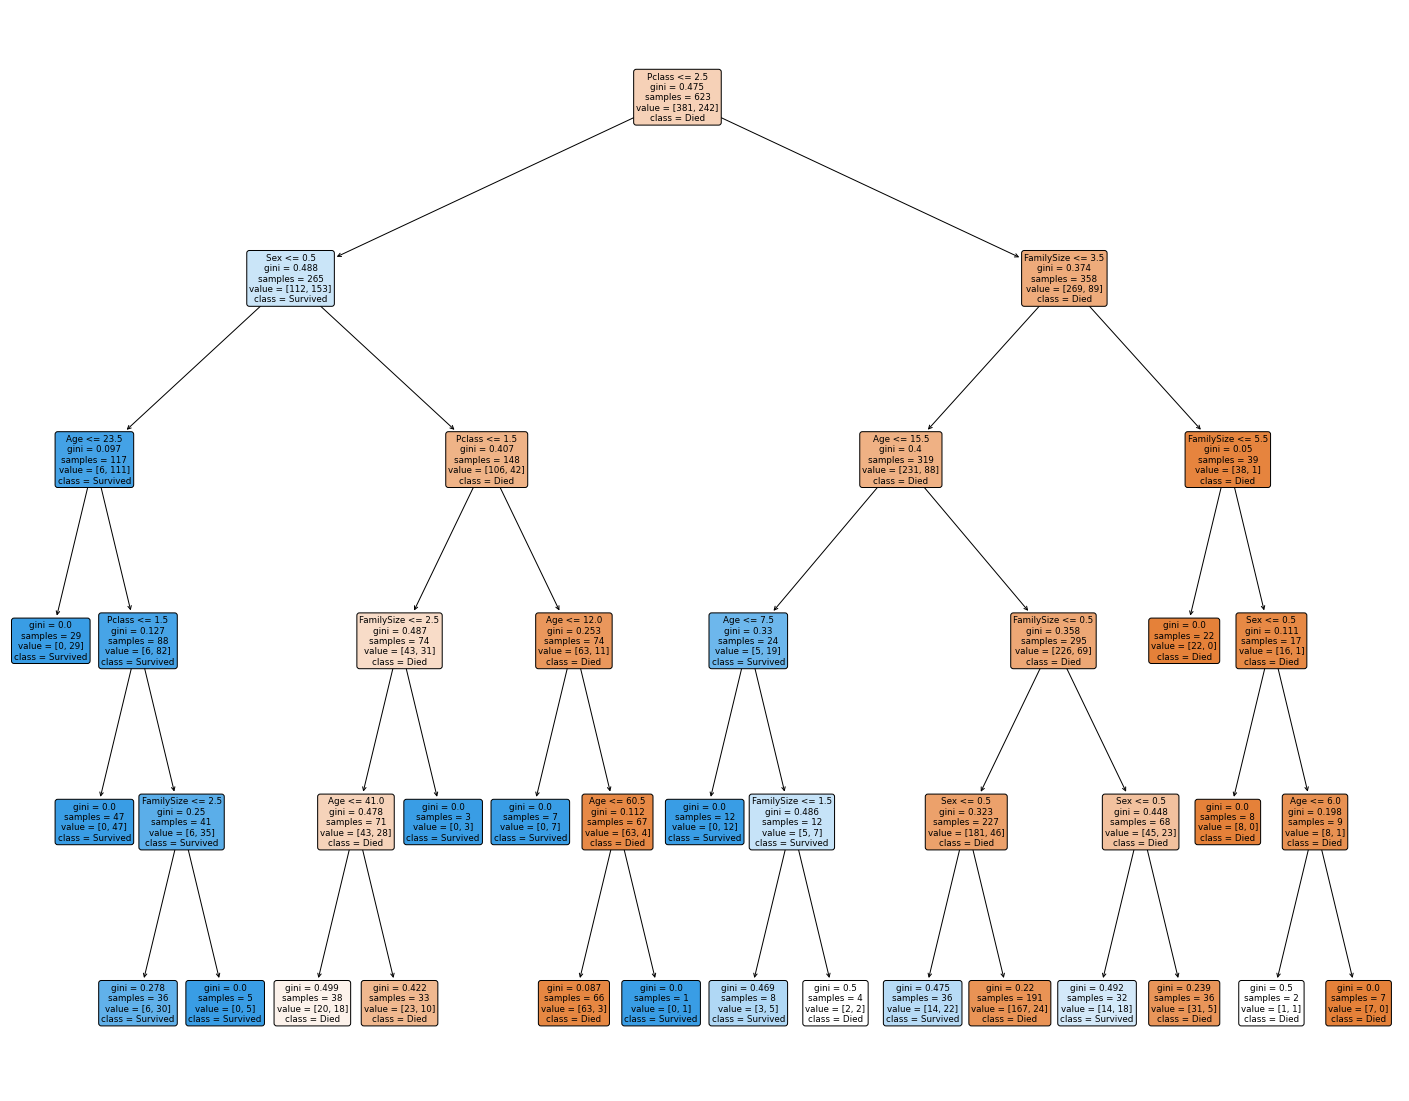

In [39]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(Tree_gini, 
                   max_depth = 5,
                   impurity = True,
                   feature_names = list(X),
                   class_names = ['Died', 'Survived'],
                   rounded = True,
                   filled= True )

# **Visualize Decision Tree with graphviz**
To plot the tree first we need to export it to DOT format with export_graphviz method . Then we can plot it in the notebook or save to the file.

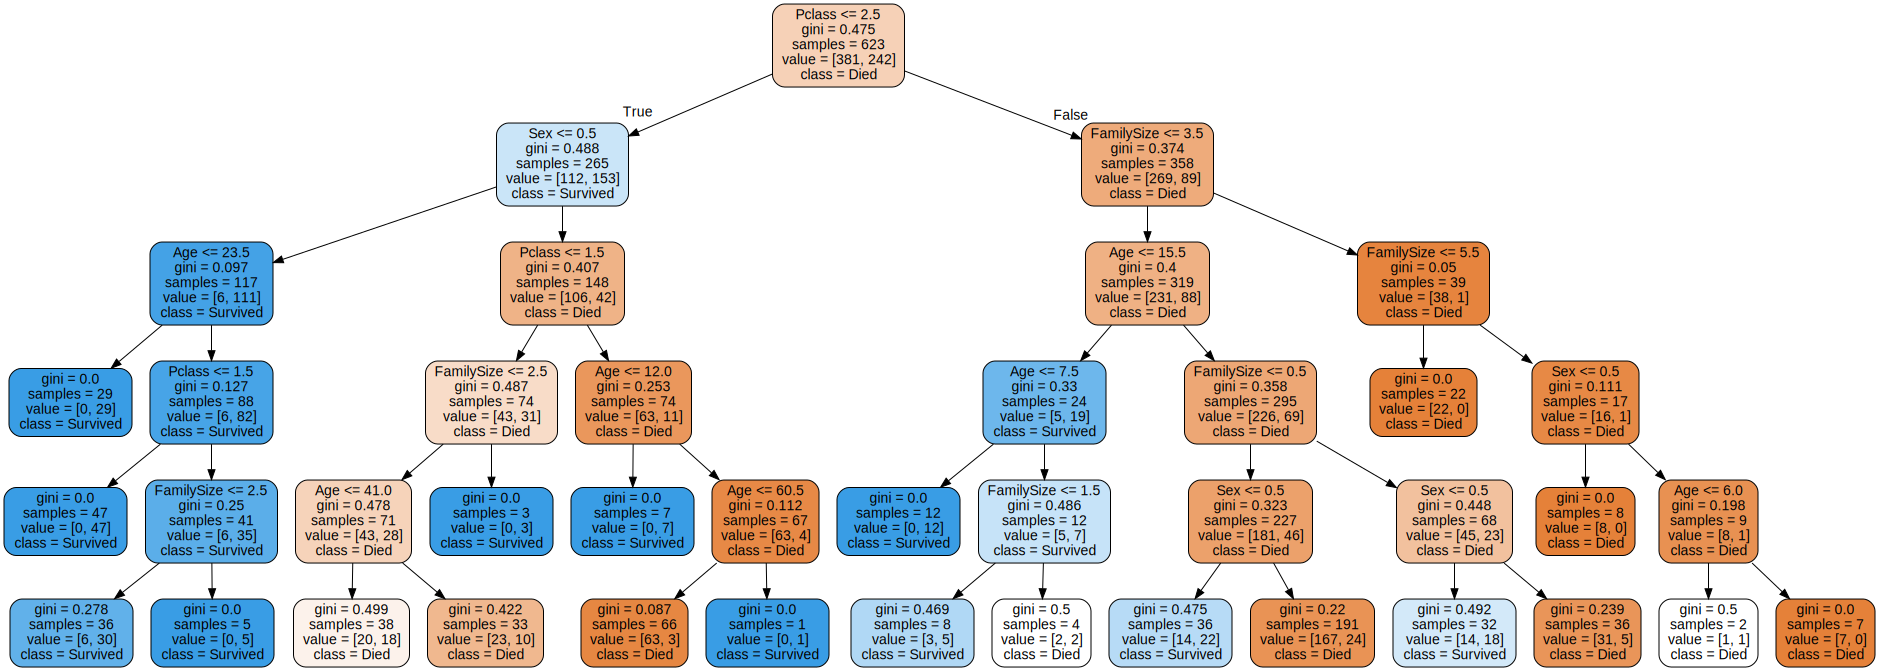

In [40]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(Tree_gini, out_file=None, 
                                max_depth = 5,
                                impurity = True,
                                feature_names = list(X),
                                class_names = ['Died', 'Survived'],
                                rounded = True,
                                filled= True )

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

# RandomForestClassifier

In [41]:
# importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [42]:
# Step 1: instantiate the RandomForestClassifiermodel
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=30,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)

# Step 2: Training the model on the data
rf.fit(X_train, y_train)

# Step 3: Testing the unseen (test) data
y_pred=rf.predict(X_test)


In [43]:
from sklearn.metrics import accuracy_score

print('Model accuracy score when the number of estimators is 30 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score when the number of estimators is 30 : 0.7873


In [44]:
# Step 1: instantiate the RandomForestClassifier model
rf1 = RandomForestClassifier(criterion='gini', 
                             n_estimators=150, #changing number of estimators to 500
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
# Step 2: Training the model on the data
rf1.fit(X_train, y_train)
# Step 3: Testing the unseen (test) data
y_pred1=rf1.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score

print('Model accuracy score when the number of estimators is 150: {0:0.4f}'. format(accuracy_score(y_test, y_pred1)))

Model accuracy score when the number of estimators is 150: 0.7948


 we can see that while  the number of estimators is 150 the accuaracy is heigher comparing too the accuaracy when  the number of estimators is 30
 
 we know that n_estimators  is the number of trees we  want to build before taking the maximum voting or averages of predictions. More trees usually means higher accuracy at the cost of slower learning. If we  wish to speed up our random forest, lower the number of estimators. If we want to increase the accuracy of our model, increase the number of trees.